## Analyzing Amazon Stock

### Getting Data Ready

In [1]:
import pandas as pd
amzn = pd.read_csv("AMZN.csv")
amzn.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,4.075000,4.478125,3.952344,4.468750,4.468750,322352000
1,2000-01-04,4.268750,4.575000,4.087500,4.096875,4.096875,349748000
2,2000-01-05,3.525000,3.756250,3.400000,3.487500,3.487500,769148000
3,2000-01-06,3.565625,3.634375,3.200000,3.278125,3.278125,375040000
4,2000-01-07,3.350000,3.525000,3.309375,3.478125,3.478125,210108000


In [2]:
amzn.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5386.000000,5386.000000,5386.000000,5386.000000,5386.000000,5.386000e+03
mean,26.218130,26.506107,25.895897,26.209719,26.209719,1.283914e+08
std,40.224375,40.655318,39.719864,40.187771,40.187771,1.015944e+08
min,0.295500,0.305000,0.275500,0.298500,0.298500,1.762600e+07
25%,2.100500,2.148625,2.069625,2.110625,2.110625,7.163300e+07
50%,7.392750,7.504500,7.309500,7.460250,7.460250,1.061070e+08
75%,30.409876,30.782001,29.802876,30.144876,30.144876,1.528715e+08
max,177.350006,177.699997,174.334503,176.572495,176.572495,2.086584e+09


The data consists of 6 columns excluding the data, with 5386 rows. The average of the OHLC prices over the course of the data seems to hover around $25-26. The minimum close price was around 30 cents, whereas the maximum close price was around $177.

In [3]:
amzn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5386 entries, 0 to 5385
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5386 non-null   object 
 1   Open       5386 non-null   float64
 2   High       5386 non-null   float64
 3   Low        5386 non-null   float64
 4   Close      5386 non-null   float64
 5   Adj Close  5386 non-null   float64
 6   Volume     5386 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 294.7+ KB


In [4]:
# Date has an object type so we'll convert it to datetime
amzn["Date"] = pd.to_datetime(amzn["Date"])
amzn.set_index("Date", inplace=True)

In [5]:
# create difference column
amzn['diff'] = amzn["Open"] - amzn["Open"]

### Visualizing Data and Calculating Measures

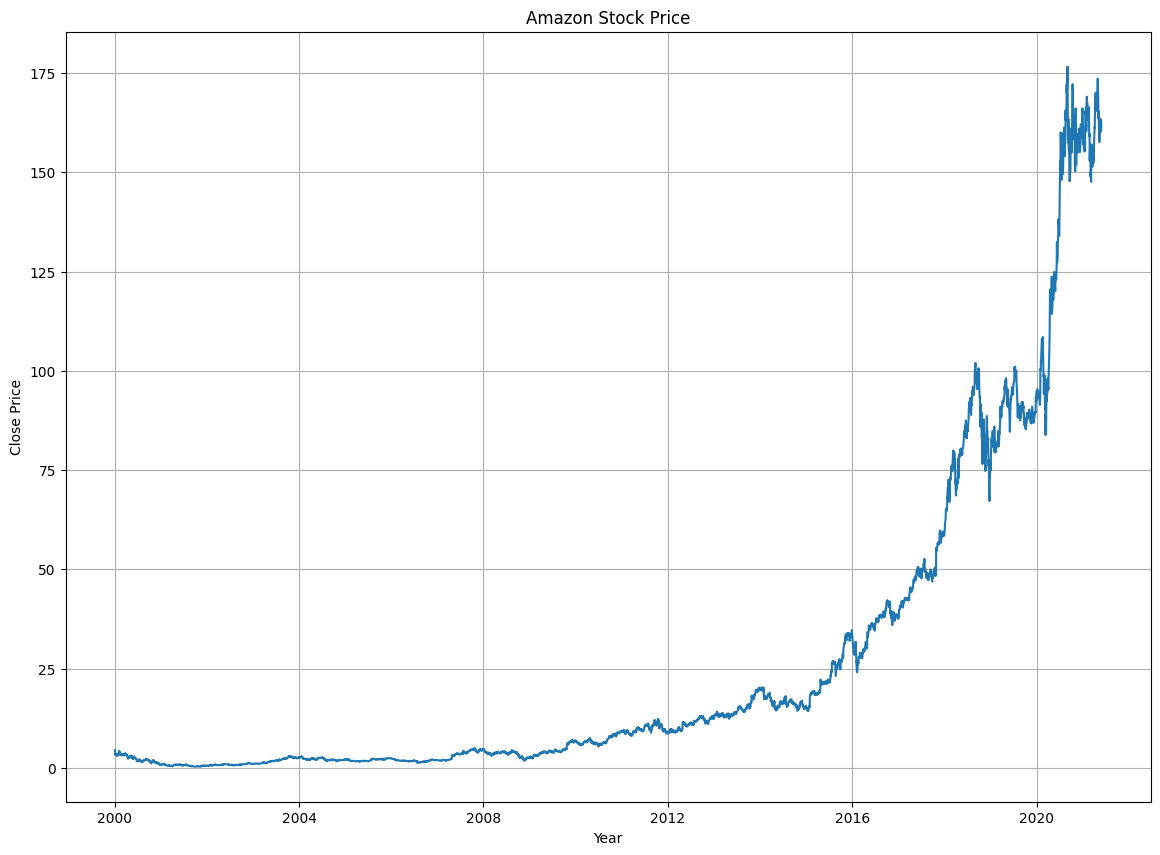

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 10))
plt.plot(amzn["Close"])
plt.xlabel("Year")
plt.ylabel("Close Price")
plt.title("Amazon Stock Price")
plt.grid()
plt.show()

This plot shows a meteoric rise in stock price. The data runs through from 200 all the way till mid 2021. Let's get more specific with the time frame such as from the start of 2015 to the end of 2019 so we can get an extra detailed analysis. Additionally, this way we can also eliminate periods affected by COVID, which may lead to some anomalous findings. 

In [7]:
# select specific time frame
amzn_new = amzn.loc[pd.Timestamp("2015-01-01"):pd.Timestamp("2019-12-31")]
amzn_new.tail()

,Open,High,Low,Close,Adj Close,Volume,diff
Date,,,,,,,
2019-12-24,89.690498,89.778503,89.378998,89.460503,89.460503,17626000,0.0
2019-12-26,90.050499,93.523003,89.974998,93.438499,93.438499,120108000,0.0
2019-12-27,94.146004,95.070000,93.300499,93.489998,93.489998,123732000,0.0
2019-12-30,93.699997,94.199997,92.030998,92.344498,92.344498,73494000,0.0
2019-12-31,92.099998,92.663002,91.611504,92.391998,92.391998,50130000,0.0


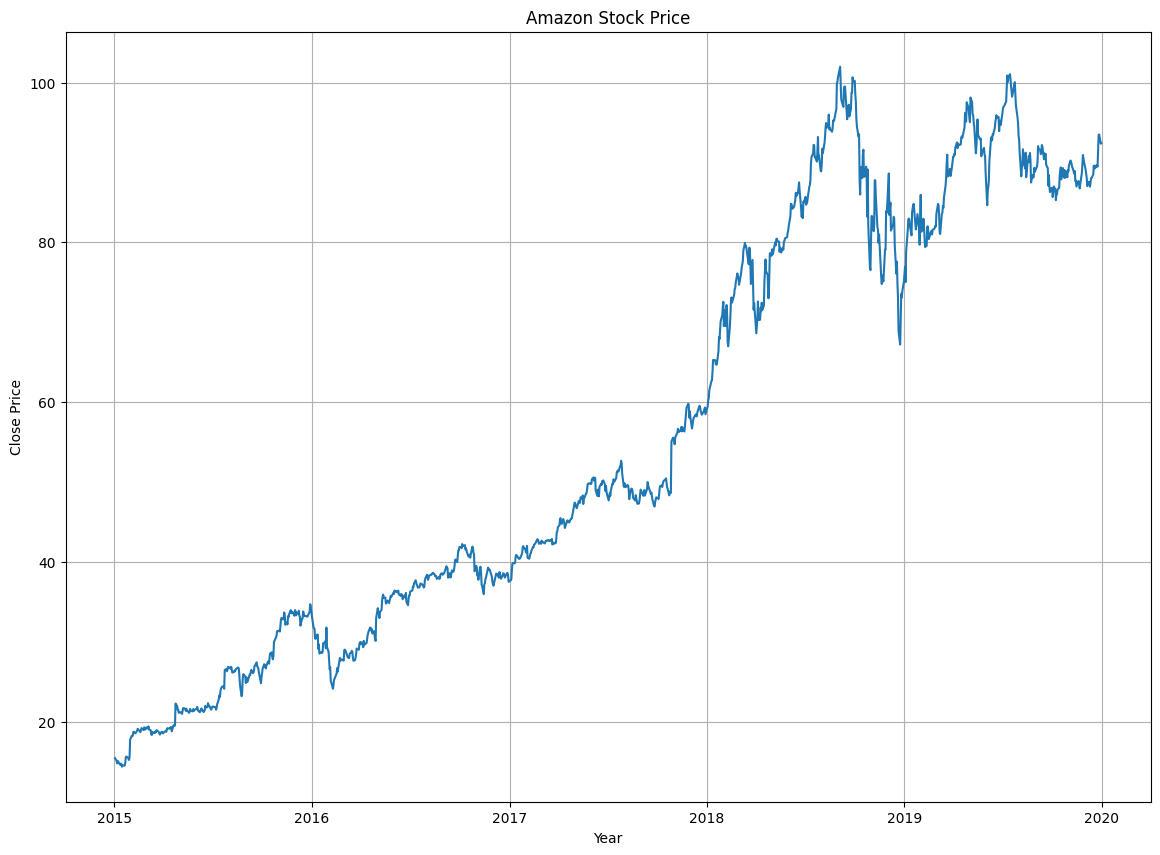

In [8]:
plt.figure(figsize = (14, 10))
plt.plot(amzn_new["Close"])
plt.xlabel("Year")
plt.ylabel("Close Price")
plt.title("Amazon Stock Price")
plt.grid()
plt.show()

We can see a consistent upward trend in the close price from 2015 all the way until mid 2018. The following year and a half has shown a fair bit a variation. 

Let's create a new array for the daily close price and also calculate the percentage change of the daily close price.

In [9]:
daily_close = amzn_new["Adj Close"]
daily_pct = daily_close.pct_change()
daily_pct.isna().values.sum()

1

Looks like we have one missing value for the percentage change. This is likely to be our very first value since it is not possible to calculate percentage change for that, so we will fill that value with a 0.

In [10]:
# Fill na values
daily_pct.fillna(0, inplace=True)
daily_pct

Date
2015-01-02    0.000000
2015-01-05   -0.020517
2015-01-06   -0.022833
2015-01-07    0.010600
2015-01-08    0.006836
                ...   
2019-12-24   -0.002114
2019-12-26    0.044467
2019-12-27    0.000551
2019-12-30   -0.012253
2019-12-31    0.000514
Name: Adj Close, Length: 1258, dtype: float64

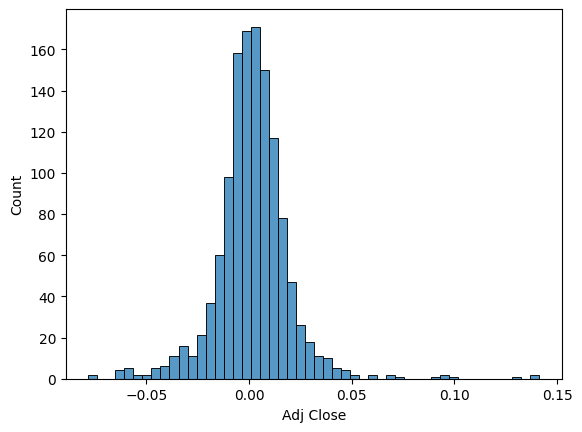

In [11]:
import seaborn as sns
sns.histplot(daily_pct, bins=50);

Most of the daily percentage change for the closing price seems to be centered around 0, which makes sense as stocks are unlikely to dramatically change day by day.

A moving average is a statistical measure commonly used in finance that captures the average change in a time series data. It helps "smooth" out the price as impacts of short-term fluctuations are usually mitigated. Let's use this concept to create a simple moving average over the daily close prices for a 50 day average and a 100 day average.

In [12]:
sma_50_day = daily_close.rolling(window=50).mean()
sma_100_day = daily_close.rolling(window=100).mean()

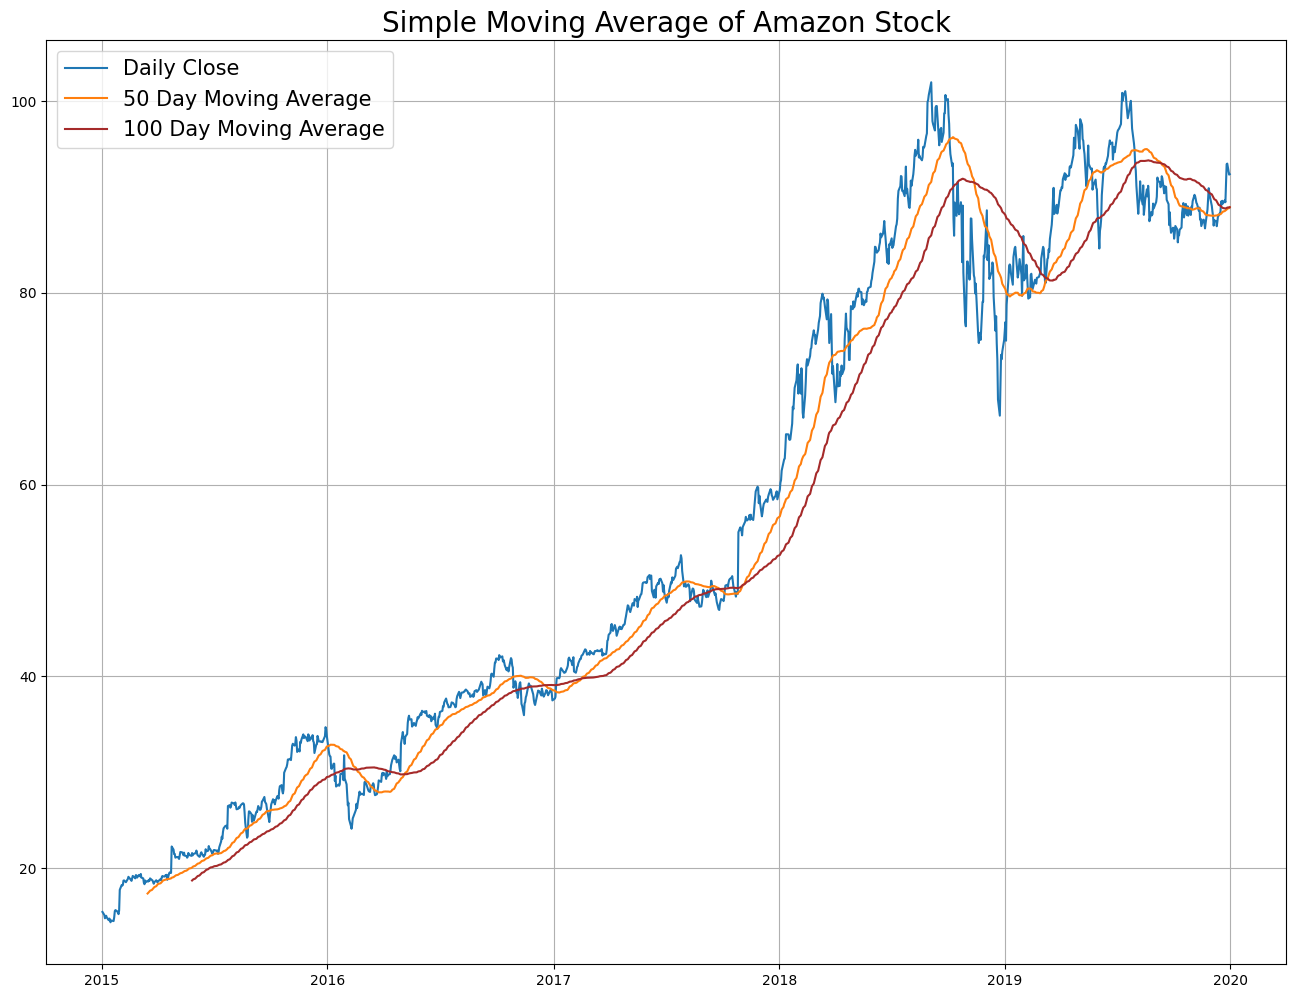

In [13]:
plt.figure(figsize=(16,12))
plt.plot(daily_close, label = "Daily Close")
plt.plot(sma_50_day, label = "50 Day Moving Average")
plt.plot(sma_100_day, label = "100 Day Moving Average", color="brown")
plt.title("Simple Moving Average of Amazon Stock", fontsize=20)
plt.grid()
plt.legend(fontsize=15)
plt.show()

We can see that the curves for the SMA plots are "smoother" than that of the close price. They also seen to be more in the "middle" in terms of values, in the way that big fluctuations (both up and down) do not have as much gravity as compared to the actual closing price. Additionally, the general trends of the SMA plots (peaks and troughs) also seem to be slightly lagged. 50 SMA's trend is slightly slower that that of close, and 100-day SMA is slower than that of 50-day. These all seem to be in line with how moving averages act.

Let's the do same but for exponential moving average. EMA is different as it gives more weight to recent events in order to make the measure more responsive to new information.

In [14]:
ema_50_day = daily_close.ewm(span=50, adjust=False).mean()
ema_100_day = daily_close.ewm(span=100, adjust=False).mean()

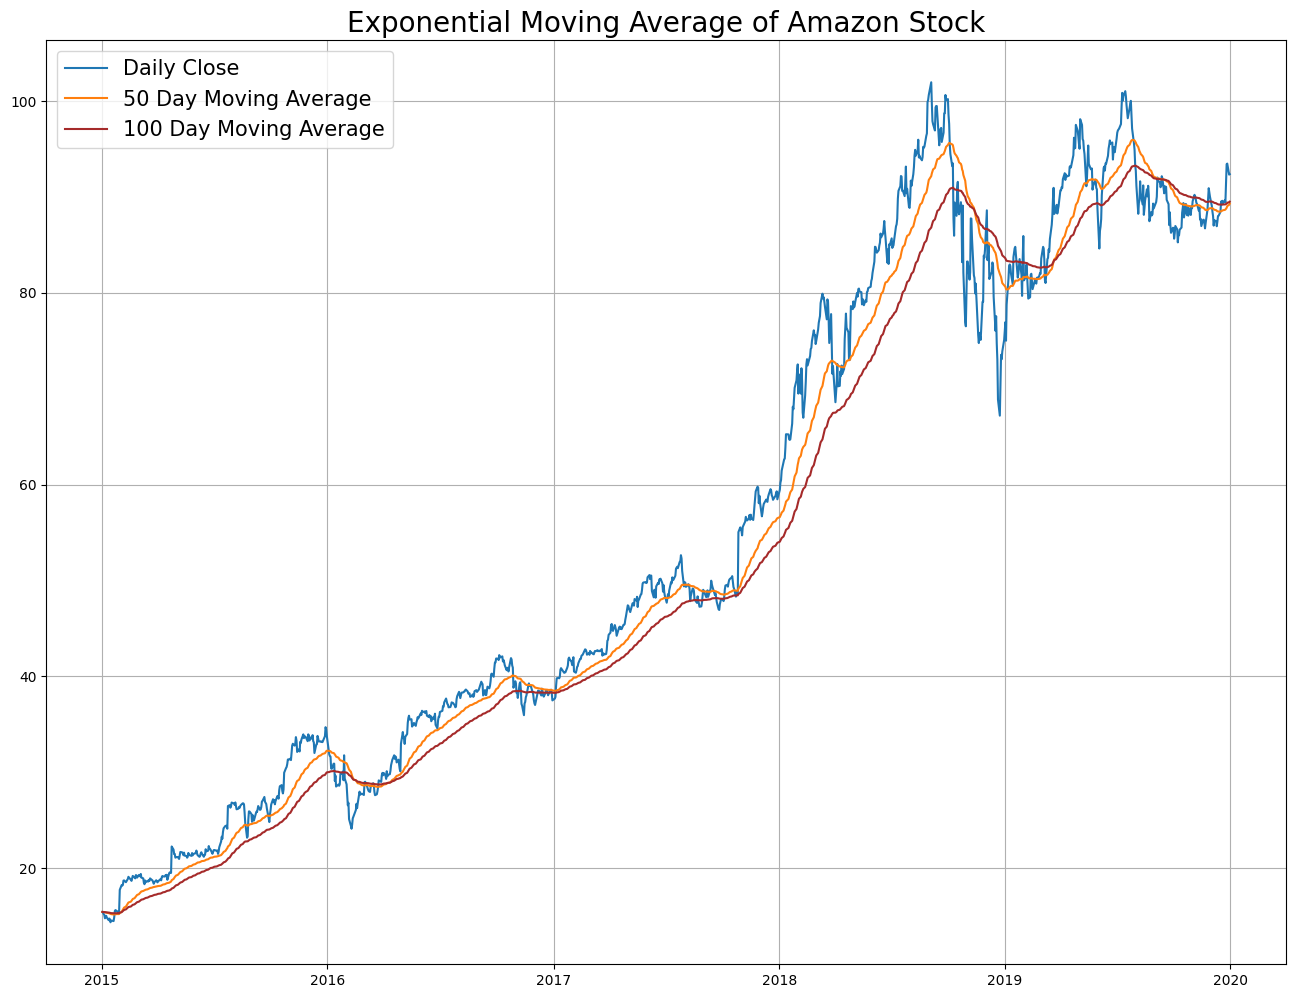

In [15]:
plt.figure(figsize=(16,12))
plt.plot(daily_close, label = "Daily Close")
plt.plot(ema_50_day, label = "50 Day Moving Average")
plt.plot(ema_100_day, label = "100 Day Moving Average", color="brown")
plt.title("Exponential Moving Average of Amazon Stock", fontsize=20)
plt.grid()
plt.legend(fontsize=15)
plt.show()

Another calculation is going to be made now, which is the volatility of the stock. This measures the variance in a stock's returns over time. Volatility is used to examine the risk profile of a stock. Higher volatility means a riskier stock.

In [16]:
import numpy as np
min_periods = 75
volatility = daily_pct.rolling(min_periods).std() * np.sqrt(min_periods)
volatility.describe()

count    1184.000000
mean        0.150825
std         0.052222
min         0.072292
25%         0.107971
50%         0.141688
75%         0.183587
max         0.295580
Name: Adj Close, dtype: float64

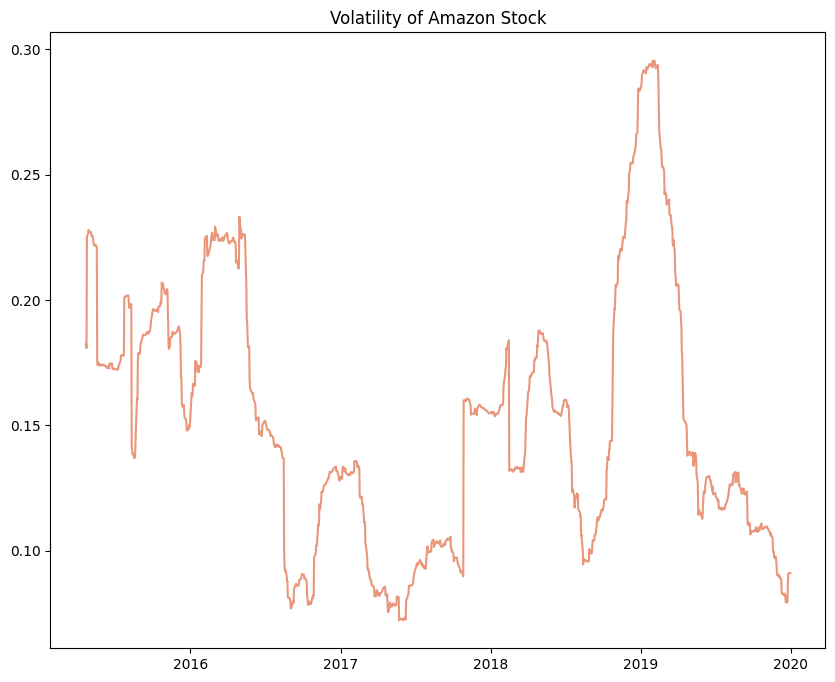

In [17]:
plt.figure(figsize=(10,8))
plt.plot(volatility, color = "darksalmon")
plt.title("Volatility of Amazon Stock")
plt.show()

Average volatility of the stock is around 15%, with a 5.2% standard deviation. The graphs show consistent movement in the volatility calculation, which means the price of the stock and percentage change in the price were in motion throughout. 

### Trading Strategy

A popular trading strategy using moving averages is a moving average crossover. This is a technique where two different moving averages, usually a short and long-term one, are used to identify potential changes in a stock's price trend. When short-term moving averages cross above the long-term moving average, it may signal a bullish trend, however, a cross below can signal a bearish trend. Research has shown that trading the crossovers of 13 day and 49 day averages produced higher returns. Let's implement this strategy on Amazon stock and see how it performs. Here, we will be using SMA.

In [18]:
short_window = 13
long_window = 49

signals = pd.DataFrame(index = amzn_new.index)
signals["signal"] = 0.0

signals["short_mavg"] = amzn_new["Close"].rolling(
    window=short_window, min_periods=1, center=False).mean()
signals["long_mavg"] = amzn_new["Close"].rolling(
    window=long_window, min_periods=1, center=False).mean()

signals["signal"][short_window:] = np.where(signals["short_mavg"][short_window:] >
signals["long_mavg"][short_window:], 1.0, 0.0)

signals["positions"] = signals["signal"].diff()

In [19]:
signals.tail()

,signal,short_mavg,long_mavg,positions
Date,,,,
2019-12-24,0.0,88.520000,88.600347,0.0
2019-12-26,1.0,88.970654,88.693551,1.0
2019-12-27,1.0,89.433307,88.777551,0.0
2019-12-30,1.0,89.847461,88.868755,0.0
2019-12-31,1.0,90.228692,88.932204,0.0


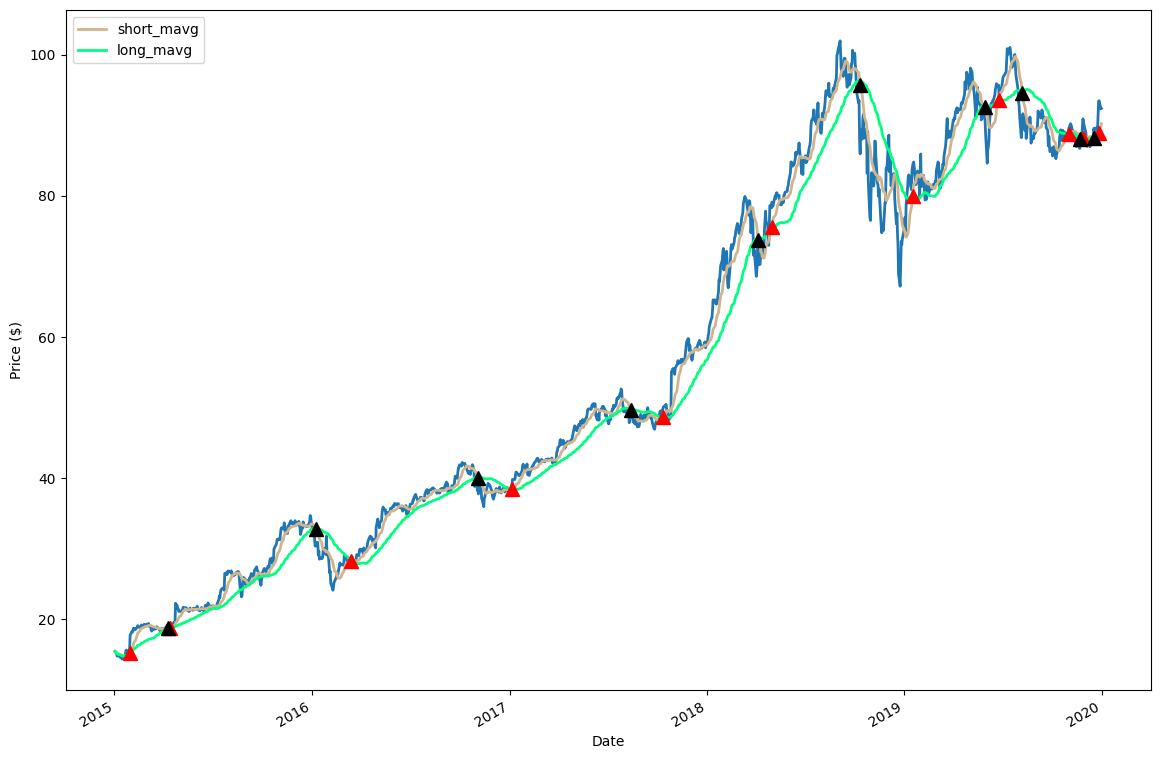

In [20]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111, ylabel="Price ($)")

amzn_new["Close"].plot(ax=ax1, lw=2)
signals[["short_mavg", "long_mavg"]].plot(ax=ax1, lw=2, color=["tan", "springgreen"])

ax1.plot(signals.loc[signals.positions == 1.0].index,
signals.short_mavg[signals.positions == 1.0 ], "^", markersize=10, color="red") # buy signal

ax1.plot(signals.loc[signals.positions == -1.0].index,
signals.short_mavg[signals.positions == -1.0 ], "^", markersize=10, color="black") # sell signal
plt.show()

### Backtesting

Now, we will backtest this strategy. Let's set a hypothetical nominal initial capital of $100.

In [21]:
initial_capital = float(100)

positions = pd.DataFrame(index=signals.index).fillna(0.0)
positions["AMZN"] = signals["signal"]
portfolio = positions.multiply(amzn_new["Adj Close"], axis = 0)
pos_diff = positions.diff()
portfolio["holdings"] = (positions.multiply(amzn_new["Adj Close"], axis=0)).sum(axis=1)
portfolio["cash"] = initial_capital - (pos_diff.multiply(amzn_new["Adj Close"], axis=0)).sum(axis=1).cumsum()
portfolio["total"] = portfolio.cash + portfolio.holdings
portfolio["returns"] = portfolio["total"].pct_change()

In [22]:
portfolio.tail()

,AMZN,holdings,cash,total,returns
Date,,,,,
2019-12-24,0.000000,0.000000,155.089498,155.089498,0.000000
2019-12-26,93.438499,93.438499,61.650999,155.089498,0.000000
2019-12-27,93.489998,93.489998,61.650999,155.140997,0.000332
2019-12-30,92.344498,92.344498,61.650999,153.995497,-0.007384
2019-12-31,92.391998,92.391998,61.650999,154.042997,0.000308


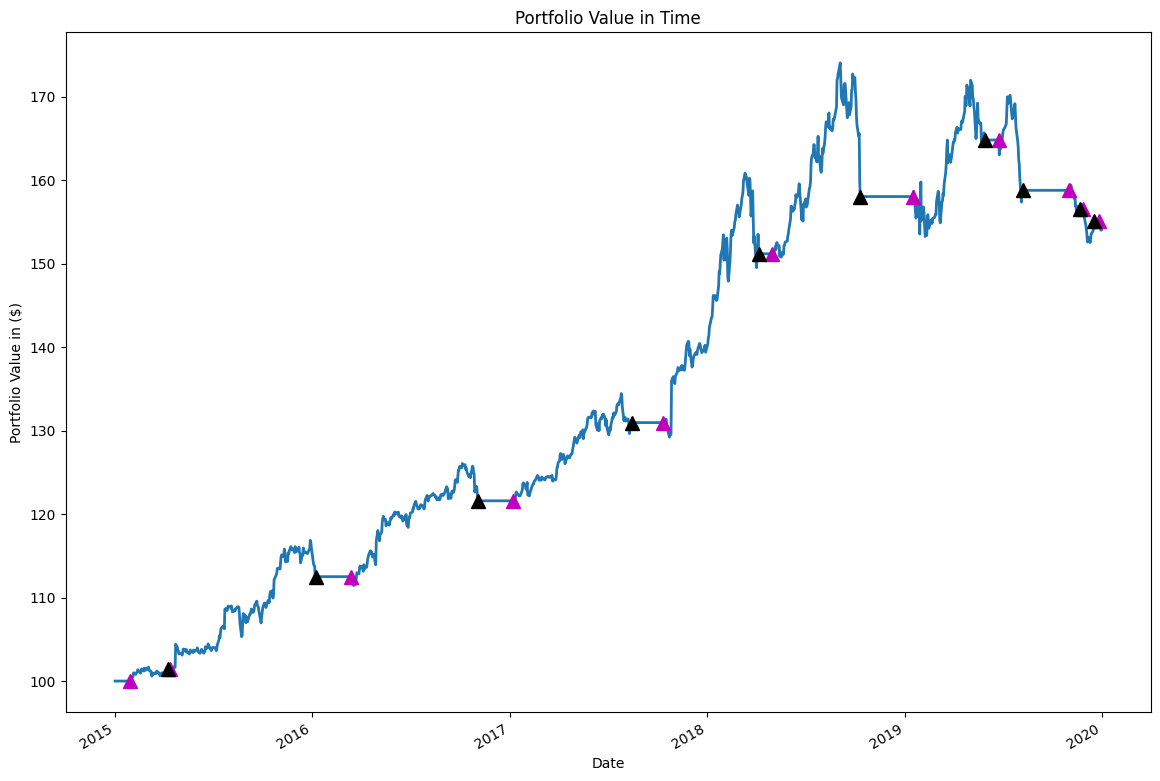

In [23]:
fig = plt.figure(figsize=(14, 10))
ax1 = fig.add_subplot(111, ylabel="Portfolio Value in ($)")
portfolio["total"].plot(ax=ax1, lw=2)
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
portfolio.total[signals.positions == 1.0], "^", markersize=10, color="m")
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
portfolio.total[signals.positions == -1.0], "^", markersize=10, color="k")
plt.title("Portfolio Value in Time")
plt.show()

If the trading strategy was started in 2015, by the end of 2019, the initial investment of $100 would have been turned into $155. For a 5-year period, this is not that bad of a performance. However, for reference, Amazon stock price increased by around a 500% during the same time. As a result, a simple buy and hold strategy would have worked far better than the moving crossover that was utilized. A combination of both strategies could have perhaps produced even greater returns. It is also possible that the 13-day and 49-day averages were not as fruitful as something more traditional like and 12-day and 26-day which is typically utilized in the MACD indicator. Additionally, we can see that the strategy produced a few false signals, so this strategy would have likely fared better in conjunction with another technical indicator. We should also taken into account slippage, inflation, and trading costs which also suggests there is room for improvement in this strategy.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=25e90ad1-934b-4ed6-84ec-e3d0fc084719' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>